In [0]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

In [2]:
from google.colab import files
uploaded = files.upload()

Saving week2.csv to week2 (1).csv


In [3]:
import io
df = pd.read_csv('week2.csv')
df

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Transactions,Day_Perc_Change,Trend
0,1,INFY,EQ,2017-05-16,951.55,953.10,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,2017,5,2.920780e+09,0.003626,Slight
1,2,INFY,EQ,2017-05-17,955.00,951.60,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,2017,5,1.384108e+09,-0.002304,Slight
2,3,INFY,EQ,2017-05-18,952.80,943.00,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,2017,5,3.878283e+09,0.009393,Slight positive
3,4,INFY,EQ,2017-05-19,961.75,961.50,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,2017,5,2.031161e+09,-0.003951,Slight
4,5,INFY,EQ,2017-05-22,957.95,958.40,966.90,956.55,960.00,961.45,962.29,2751526,2.647755e+09,99616,2034031,73.92,2017,5,2.647766e+09,0.003654,Slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,491,INFY,EQ,2019-05-07,718.40,720.40,727.90,718.70,724.40,724.55,724.51,5747536,4.164127e+09,104342,3690425,64.21,2019,5,4.164147e+09,0.008561,Slight positive
489,492,INFY,EQ,2019-05-08,724.55,721.00,726.00,716.50,718.95,719.35,721.65,6247642,4.508603e+09,162077,3950857,63.24,2019,5,4.508611e+09,-0.007177,Slight
490,493,INFY,EQ,2019-05-09,719.35,719.15,730.30,715.80,722.00,721.05,724.48,7396525,5.358635e+09,242225,4808832,65.01,2019,5,5.358634e+09,0.002363,Slight
491,494,INFY,EQ,2019-05-10,721.05,720.80,726.00,715.00,716.50,716.85,717.88,8352335,5.995942e+09,181229,5545377,66.39,2019,5,5.995974e+09,-0.005825,Slight


In [4]:
df["Date"].dtype

dtype('O')

In [0]:
df['Date'] = df['Date'].astype('datetime64')

In [6]:
df['Date'].dtype

dtype('<M8[ns]')

In [0]:
df = df.set_index(df['Date'])

In [8]:
df.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Transactions,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-16,1,INFY,EQ,2017-05-16,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,2017,5,2.920780e+09,0.003626,Slight
2017-05-17,2,INFY,EQ,2017-05-17,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,2017,5,1.384108e+09,-0.002304,Slight
2017-05-18,3,INFY,EQ,2017-05-18,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,2017,5,3.878283e+09,0.009393,Slight positive
2017-05-19,4,INFY,EQ,2017-05-19,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,2017,5,2.031161e+09,-0.003951,Slight
2017-05-22,5,INFY,EQ,2017-05-22,957.95,958.4,966.90,956.55,960.00,961.45,962.29,2751526,2.647755e+09,99616,2034031,73.92,2017,5,2.647766e+09,0.003654,Slight


Text(0.5, 1.0, 'Closing Price Summary')

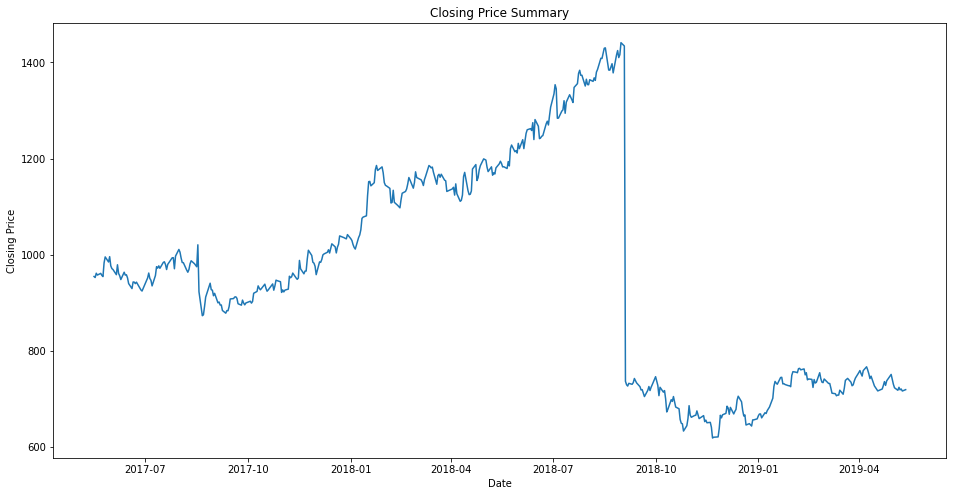

In [9]:
plt.figure(figsize=(16,8))
x = df['Date']
y = df['Close Price']
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Summary')

In [10]:
D1 = df['Day_Perc_Change'].max()
D1

0.046810910582444576

In [11]:
D2 = df['Day_Perc_Change'].idxmax()
D2

Timestamp('2017-08-17 00:00:00')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, 'Daily Change in Stock Price')

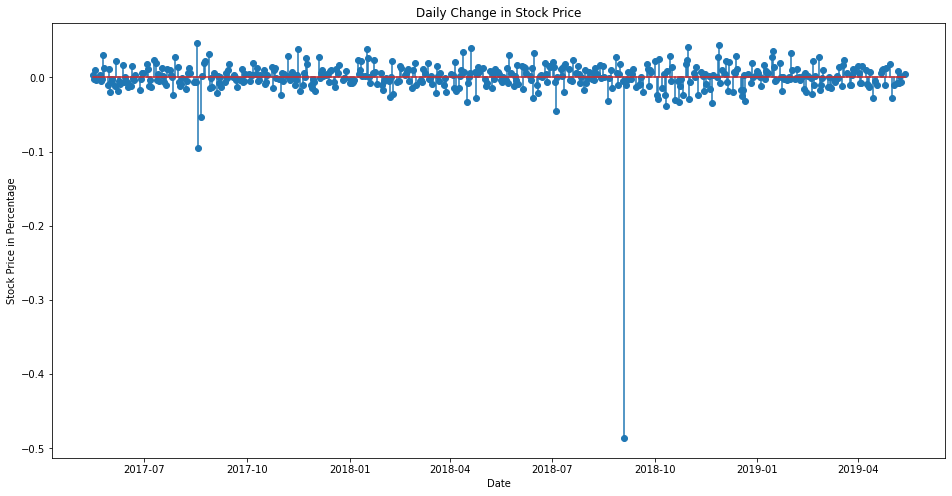

In [12]:
plt.figure(figsize=(16,8))
x = df['Date']
y = df['Day_Perc_Change']
plt.xlabel('Date')
plt.ylabel('Stock Price in Percentage')
plt.stem(x,y)
plt.title('Daily Change in Stock Price')

In [13]:
maximum = y.max()
maximum

0.046810910582444576

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, 'Daily Change in Total Traded Quantity')

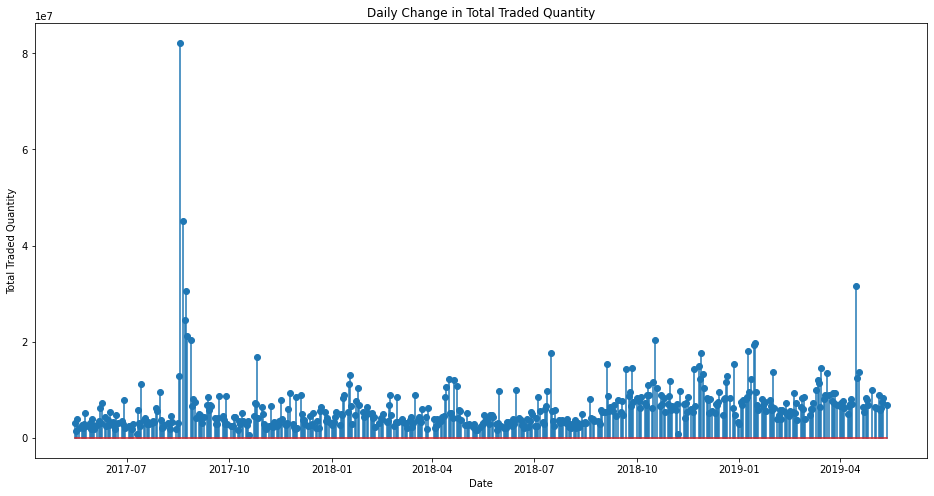

In [14]:
plt.figure(figsize=(16,8))
plt.stem( df['Date'] , df['Total Traded Quantity'])
plt.xlabel('Date')
plt.ylabel('Total Traded Quantity')
plt.title('Daily Change in Total Traded Quantity')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, 'Stem plot')

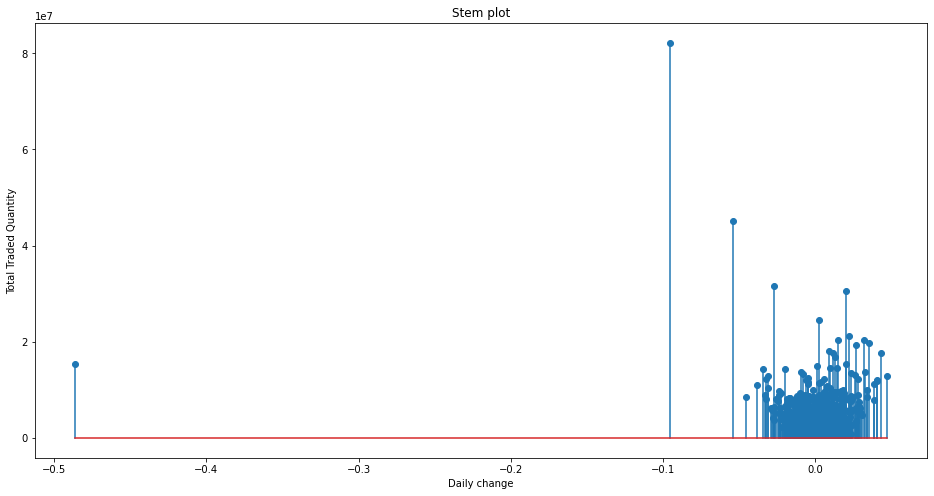

In [15]:
plt.figure(figsize=(16,8))
plt.stem(df['Day_Perc_Change'] , df['Total Traded Quantity'])
plt.xlabel('Daily change')
plt.ylabel('Total Traded Quantity')
plt.title('Stem plot')

Text(0.5, 1.0, 'Daily Percentage Change v/s Total Traded Quantity')

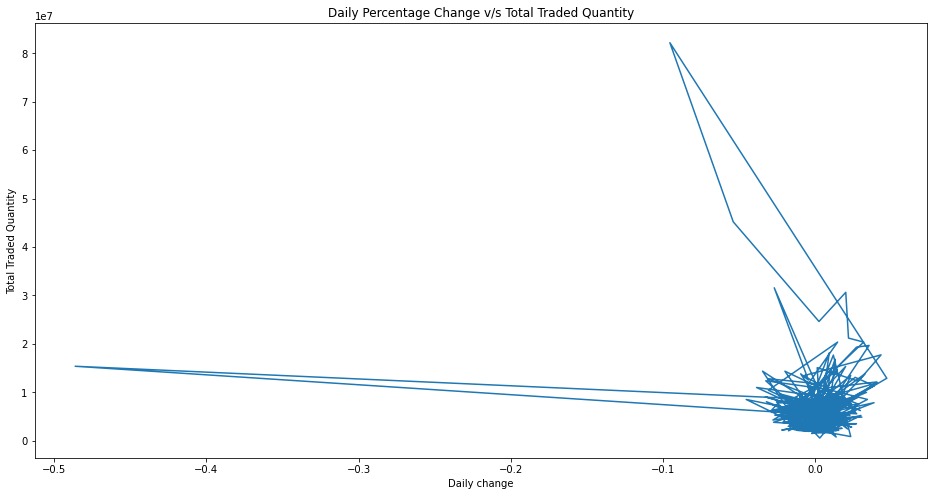

In [16]:
plt.figure(figsize=(16,8))
plt.plot(df['Day_Perc_Change'] , df['Total Traded Quantity'])
plt.xlabel('Daily change')
plt.ylabel('Total Traded Quantity')
plt.title('Daily Percentage Change v/s Total Traded Quantity')

([<matplotlib.patches.Wedge at 0x7fa77c71ba90>,
 [Text(2.749776661961811, 0.03504724425914313, 'Bear drop'),
  Text(2.300440593637313, 1.5068089046543376, 'Negative'),
  Text(-0.6509171160401049, 2.6718545821294306, 'Positive'),
  Text(-2.1016074655513783, -1.7736251184336314, 'Slight'),
  Text(2.146128769807936, -1.7194857671416401, 'Slight positive'),
  Text(2.6999010928189184, -0.5225266395077002, 'Top gainers'),
  Text(2.745478575771231, -0.15763054900993118, 'Top losers')],
 [Text(1.499878179251897, 0.01911667868680534, '0.4%'),
  Text(1.2547857783476255, 0.8218957661750932, '17.6%'),
  Text(-0.35504569965823907, 1.457375226616053, '21.5%'),
  Text(-1.1463313448462062, -0.9674318827819808, '43.2%'),
  Text(1.1706156926225106, -0.9379013275318038, '13.0%'),
  Text(1.4726733233557736, -0.28501453064056376, '2.4%'),
  Text(1.4975337686024897, -0.08598029945996247, '1.8%')])

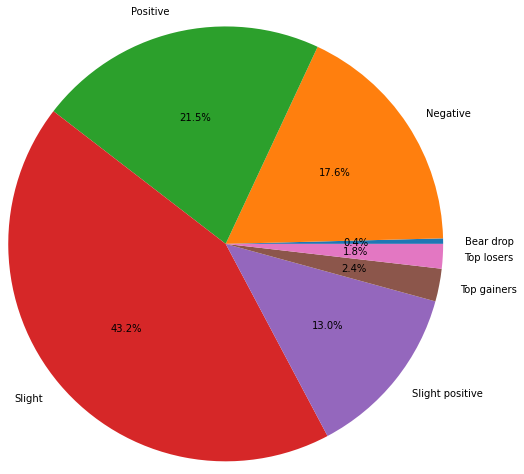

In [17]:
pie_data = df.groupby('Trend')
pie_label = sorted([i for i in df.loc[: , 'Trend'].unique()])
plt.pie(pie_data['Trend'].count(), labels= pie_label,autopct= '%1.1f%%', radius= 2.5 )

Text(0.5, 1.0, 'Mean of "Total Traded Quantity" by Trend type')

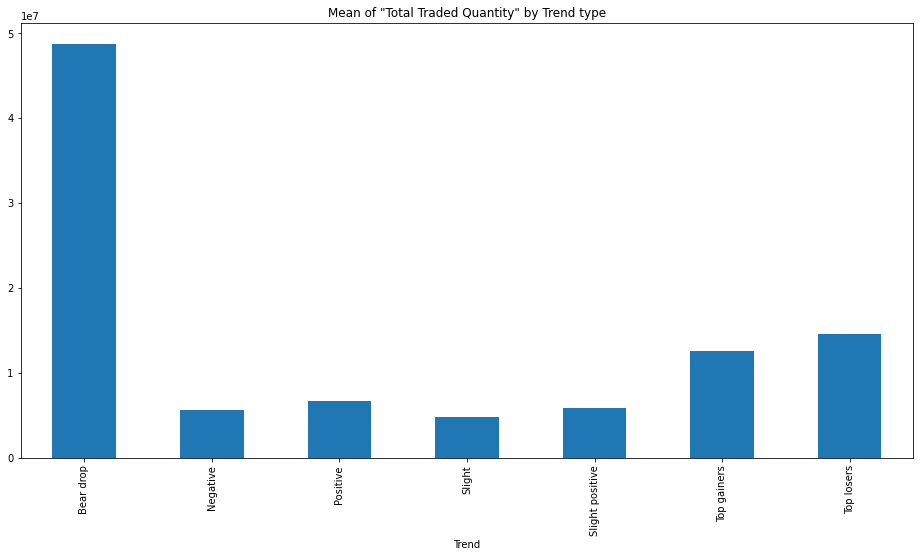

In [18]:
plt.figure(figsize=(16,8))
df.groupby(df['Trend'])['Total Traded Quantity'].mean().plot.bar()
plt.title('Mean of "Total Traded Quantity" by Trend type')

Text(0.5, 1.0, 'Median of "Total Traded Quantity" by Trend type')

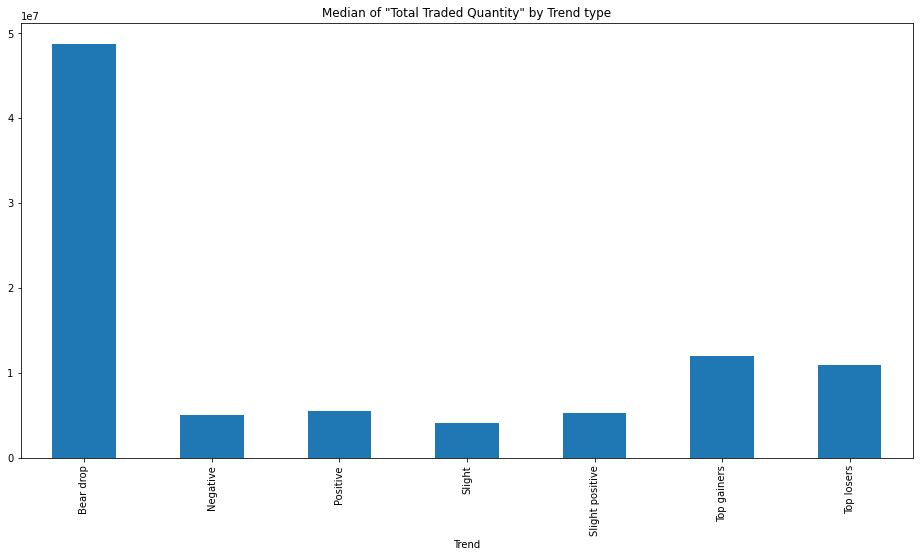

In [19]:
plt.figure(figsize=(16,8))
df.groupby(df['Trend'])['Total Traded Quantity'].median().plot.bar()
plt.title('Median of "Total Traded Quantity" by Trend type')

Text(0.5, 1.0, 'Daily Return (Percentage) Distribution')

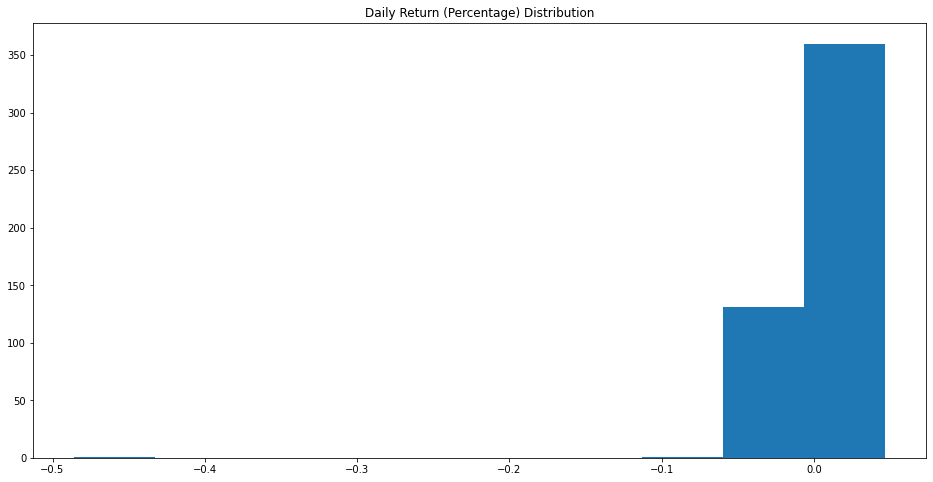

In [20]:
plt.figure(figsize=(16,8))
plt.hist(df['Day_Perc_Change'])
plt.title('Daily Return (Percentage) Distribution')

In [21]:
from google.colab import files
uploaded = files.upload()

Saving IRCON.csv to IRCON (1).csv
Saving ITDC.csv to ITDC (1).csv
Saving JETAIRWAYS.csv to JETAIRWAYS (1).csv
Saving JKLAKSHMI.csv to JKLAKSHMI (1).csv
Saving LALPATHLAB.csv to LALPATHLAB (1).csv


In [0]:
import io
ircon_df = pd.read_csv('IRCON.csv')
itdc_df = pd.read_csv('ITDC.csv')
jetair_df = pd.read_csv('JETAIRWAYS.csv')
jklakshmi_df = pd.read_csv('JKLAKSHMI.csv')
lalpath_df = pd.read_csv('LALPATHLAB.csv')

In [0]:
ircon_df = ircon_df[ircon_df['Series'] == 'EQ']
itdc_df = itdc_df[itdc_df['Series'] == 'EQ']
jetair_df = jetair_df[jetair_df['Series'] == 'EQ']
jklakshmi_df = jklakshmi_df[jklakshmi_df['Series'] == 'EQ']
lalpath_df = lalpath_df[lalpath_df['Series'] == 'EQ']

In [0]:
ircon_df = ircon_df[['Close Price']]
ircon_df.columns = ['IRCON']
itdc_df = itdc_df[['Close Price']]
itdc_df.columns = ['ITDC']
jetair_df = jetair_df[['Close Price']]
jetair_df.columns = ['JET AIRWAYS']
jklakshmi_df = jklakshmi_df[['Close Price']]
jklakshmi_df.columns = ['JK LAKSHMI']
lalpath_df = lalpath_df[['Close Price']]
lalpath_df.columns = ['LAL PATH LABS']

In [25]:
data = pd.concat([ircon_df, itdc_df, jetair_df, jklakshmi_df, lalpath_df] , axis=1)
data

,IRCON,ITDC,JET AIRWAYS,JK LAKSHMI,LAL PATH LABS
0,415.3,650.15,527.50,510.80,900.60
1,427.0,636.70,534.15,527.50,910.95
2,421.4,626.75,528.90,516.20,911.70
3,407.1,604.65,522.70,478.95,909.75
4,399.8,594.30,520.40,469.55,910.25
...,...,...,...,...,...
490,NaN,251.95,131.35,352.20,1013.10
491,NaN,246.25,147.40,353.00,1006.10
492,NaN,251.15,151.75,342.10,982.90
493,NaN,242.75,139.10,340.05,980.65


In [0]:
data.dropna(inplace= True, axis= 0)
data_pct = data.pct_change() * 100

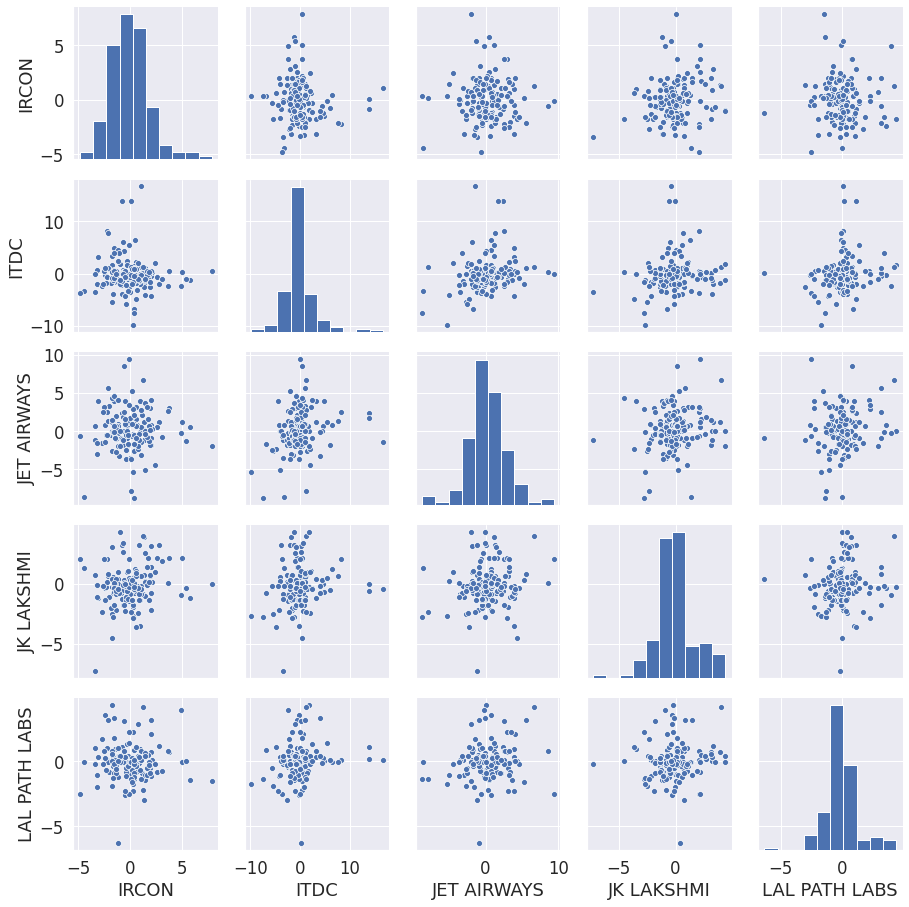

In [29]:
import seaborn as s
s.set_style('whitegrid')
s.set(font_scale = 1.5)
s.pairplot(data_pct)

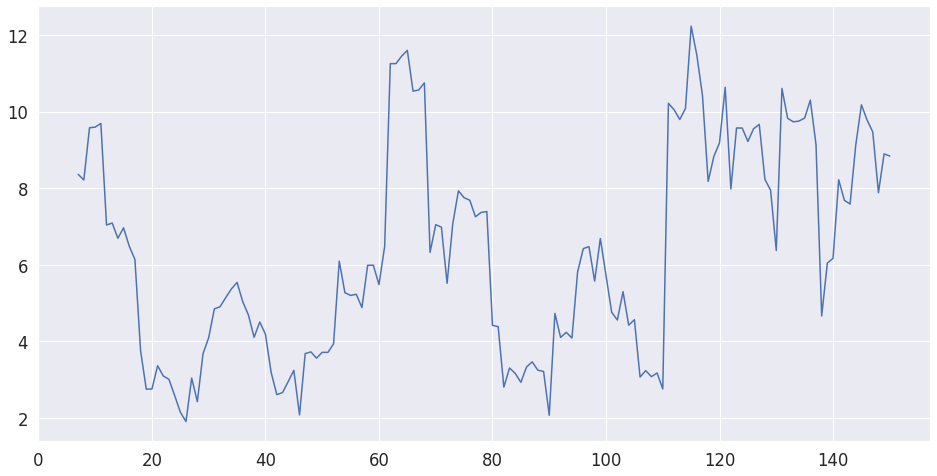

In [30]:
jetair_roll = data_pct['JET AIRWAYS'].rolling(7).std()*np.sqrt(7)
jetair_roll.plot(figsize=(16,8))

In [32]:
from google.colab import files
uploaded = files.upload()

Saving Nifty50.csv to Nifty50.csv


In [0]:
import io
nifty_df = pd.read_csv('Nifty50.csv')

In [46]:
nifty = nifty_df[['Close']]
nifty.columns=['NIFTY']
nifty.head()

,NIFTY
0,9445.40
1,9512.25
2,9525.75
3,9429.45
4,9427.90


In [47]:
new_data = pd.concat([nifty, jetair_df], axis= 1)
new_data.pct_change() * 100

,NIFTY,JET AIRWAYS
0,NaN,NaN
1,0.707752,1.260664
2,0.141922,-0.982870
3,-1.010944,-1.172244
4,-0.016438,-0.440023
...,...,...
489,-0.865217,-4.572714
490,-1.204133,3.181461
491,-0.507507,12.219262
492,-0.202623,2.951153


In [48]:
new_data.dropna(inplace= True, axis=0)
new_data.head()

,NIFTY,JET AIRWAYS
0,9445.40,527.50
1,9512.25,534.15
2,9525.75,528.90
3,9429.45,522.70
4,9427.90,520.40


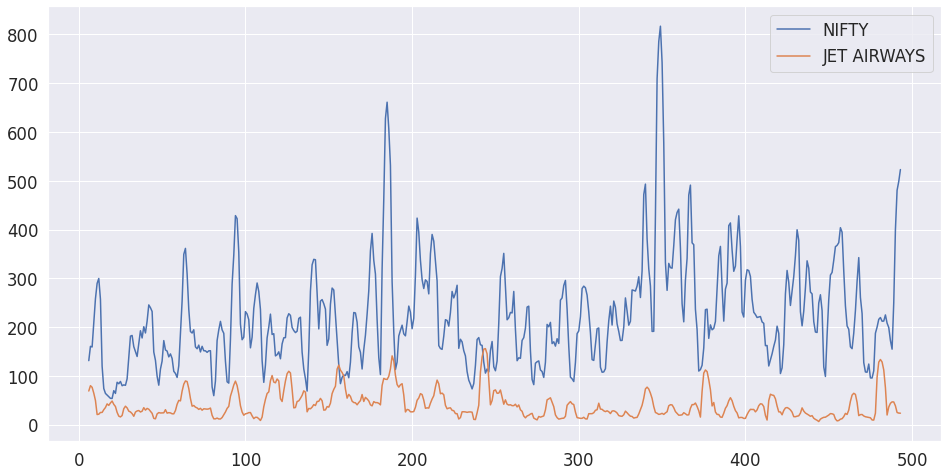

In [49]:
volatility = new_data.rolling(7).std()*np.sqrt(7)
volatility.plot(figsize=(16,8))

In [56]:
short_window = 21
long_window = 34

signals = pd.DataFrame(index = new_data.index)
signals['signal'] = 0.0
signals['short_mavg'] = new_data['JET AIRWAYS'].rolling(window= short_window, min_periods= 1, center= False).mean()
signals['long_mavg'] = new_data['JET AIRWAYS'].rolling(window= long_window, min_periods= 1, center= False).mean()

signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()
signals

,signal,short_mavg,long_mavg,positions
0,0.0,527.500000,527.500000,NaN
1,0.0,530.825000,530.825000,0.0
2,0.0,530.183333,530.183333,0.0
3,0.0,528.312500,528.312500,0.0
4,0.0,526.730000,526.730000,0.0
...,...,...,...,...
489,0.0,203.264286,221.260294,0.0
490,0.0,197.530952,218.129412,0.0
491,0.0,192.154762,215.548529,0.0
492,0.0,187.185714,213.048529,0.0


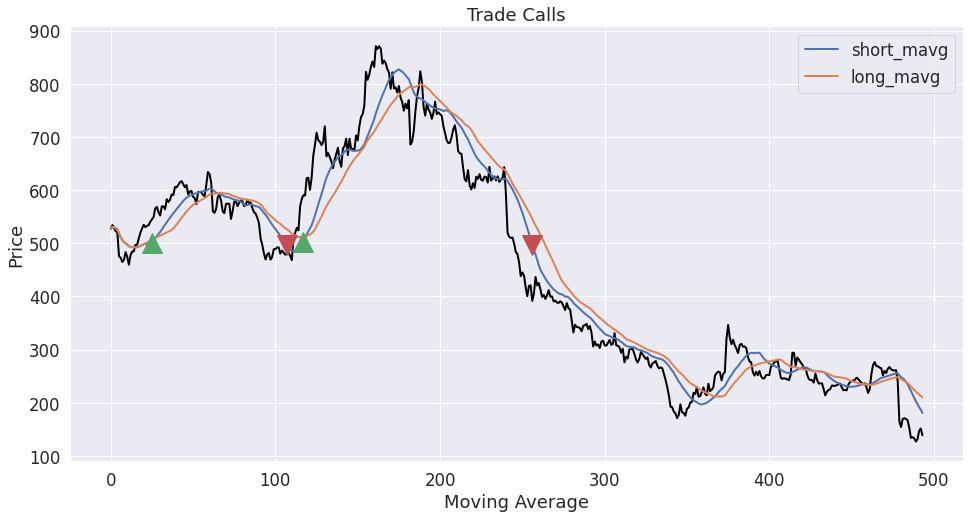

In [60]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111, xlabel='Moving Average', ylabel='Price')
new_data['JET AIRWAYS'].plot(ax=ax1, color='black', lw=2.)
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0], '^' , markersize=20,color='g')
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0], 'v' , markersize=20,color='r')
plt.title('Trade Calls')
plt.show()

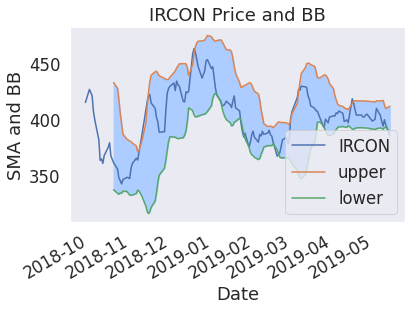

In [61]:
symbol = 'IRCON'
df = pd.read_csv('IRCON.csv'.format(symbol), index_col= 'Date',
                 parse_dates= True, usecols=['Date', 'Close Price'],
                 na_values= 'nan')
df = df.rename(columns={'Close Price' : symbol})
df.dropna(inplace= True)
sma = df.rolling(window=14).mean()
rstd = df.rolling(window=14).std()
upper_band = sma + 2 * rstd
upper_band = upper_band.rename(columns={symbol: 'upper'})
lower_band = sma - 2 * rstd
lower_band = lower_band.rename(columns={symbol: 'lower'})
df = df.join(upper_band).join(lower_band)
ax = df.plot(title='{} Price and BB'.format(symbol))
ax.fill_between(df.index, lower_band['lower'], upper_band['upper'], color='#ADCCFF')
ax.set_xlabel('Date')
ax.set_ylabel('SMA and BB')
ax.grid()
plt.show()

In [0]:
df.to_csv('module2.csv')